In [11]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = 'dataframe_input.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Now 'df' contains your Excel data in a DataFrame format
df.head(10)

,dish_id,path_filename,ingr_1_name,ingr_2_name,ingr_3_name,ingr_4_name,ingr_5_name
0,dish_1556572657,dish_1556572657/rgb.png,olives,NaN,NaN,NaN,NaN
1,dish_1556573514,dish_1556573514/rgb.png,mixed greens,NaN,NaN,NaN,NaN
2,dish_1556575014,dish_1556575014/rgb.png,olives,NaN,NaN,NaN,NaN
3,dish_1556575083,dish_1556575083/rgb.png,brussels sprouts,NaN,NaN,NaN,NaN
4,dish_1556575124,dish_1556575124/rgb.png,celery,NaN,NaN,NaN,NaN
5,dish_1561737271,dish_1561737271/rgb.png,sausage,hash browns,pineapple,broccoli,egg whites
6,dish_1561737293,dish_1561737293/rgb.png,broccoli,cantaloupe,sausage,pineapple,egg whites
7,dish_1561737776,dish_1561737776/rgb.png,bagels,cream cheese,NaN,NaN,NaN
8,dish_1561737839,dish_1561737839/rgb.png,berries,NaN,NaN,NaN,NaN
9,dish_1561739160,dish_1561739160/rgb.png,berries,NaN,NaN,NaN,NaN


In [12]:
df.columns

Index(['dish_id', 'path_filename', 'ingr_1_name', 'ingr_2_name', 'ingr_3_name',
       'ingr_4_name', 'ingr_5_name'],
      dtype='object')

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

# Handle Missing Values
df.fillna('01_erase_me', inplace=True)

# Tokenize Ingredients
ingredients = df[['ingr_1_name', 'ingr_2_name', 'ingr_3_name', 'ingr_4_name', 'ingr_5_name']].values.tolist()

# Flatten list of ingredients
all_ingredients = [ingredient for sublist in ingredients for ingredient in sublist]

# Prepare Labels
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(ingredients)

# Convert labels to boolean
#labels = labels.astype(bool)

# Add encoded labels to DataFrame
for i, label in enumerate(mlb.classes_):
    df[label] = labels[:, i]

# Drop original ingredient columns
df.drop(columns=['ingr_1_name', 'ingr_2_name', 'ingr_3_name', 'ingr_4_name', 'ingr_5_name'], inplace=True)

# You can now use df for your deep learning model
df.head(10)

,dish_id,path_filename,01_erase_me,bagels,berries,broccoli,brussels sprouts,cantaloupe,celery,cream cheese,egg whites,hash browns,mixed greens,olives,pineapple,sausage
0,dish_1556572657,dish_1556572657/rgb.png,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,dish_1556573514,dish_1556573514/rgb.png,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,dish_1556575014,dish_1556575014/rgb.png,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,dish_1556575083,dish_1556575083/rgb.png,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,dish_1556575124,dish_1556575124/rgb.png,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,dish_1561737271,dish_1561737271/rgb.png,0,0,0,1,0,0,0,0,1,1,0,0,1,1
6,dish_1561737293,dish_1561737293/rgb.png,0,0,0,1,0,1,0,0,1,0,0,0,1,1
7,dish_1561737776,dish_1561737776/rgb.png,1,1,0,0,0,0,0,1,0,0,0,0,0,0
8,dish_1561737839,dish_1561737839/rgb.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9,dish_1561739160,dish_1561739160/rgb.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df.drop(columns=['01_erase_me'], inplace = True)
df.head(10)

,dish_id,path_filename,bagels,berries,broccoli,brussels sprouts,cantaloupe,celery,cream cheese,egg whites,hash browns,mixed greens,olives,pineapple,sausage
0,dish_1556572657,dish_1556572657/rgb.png,0,0,0,0,0,0,0,0,0,0,1,0,0
1,dish_1556573514,dish_1556573514/rgb.png,0,0,0,0,0,0,0,0,0,1,0,0,0
2,dish_1556575014,dish_1556575014/rgb.png,0,0,0,0,0,0,0,0,0,0,1,0,0
3,dish_1556575083,dish_1556575083/rgb.png,0,0,0,1,0,0,0,0,0,0,0,0,0
4,dish_1556575124,dish_1556575124/rgb.png,0,0,0,0,0,1,0,0,0,0,0,0,0
5,dish_1561737271,dish_1561737271/rgb.png,0,0,1,0,0,0,0,1,1,0,0,1,1
6,dish_1561737293,dish_1561737293/rgb.png,0,0,1,0,1,0,0,1,0,0,0,1,1
7,dish_1561737776,dish_1561737776/rgb.png,1,0,0,0,0,0,1,0,0,0,0,0,0
8,dish_1561737839,dish_1561737839/rgb.png,0,1,0,0,0,0,0,0,0,0,0,0,0
9,dish_1561739160,dish_1561739160/rgb.png,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

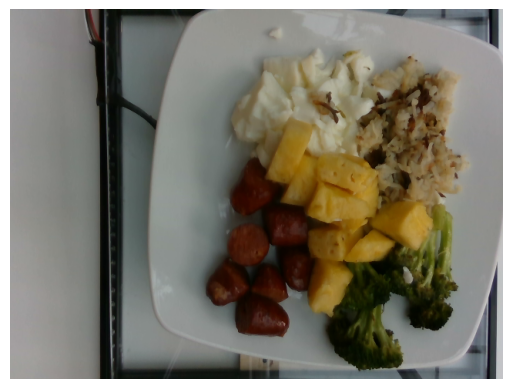

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image_path = train_df.iloc[0]['path_filename']
image = mpimg.imread(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Create data generators for images
'''train_datagen is used to generate data for training the model by reading images from a directory, performing transformations, and normalization.

ImageDataGenerator is a class in TensorFlow/Keras that generates batches of augmented/normalized data from image data.
It provides a flexible way to preprocess and augment images on-the-fly during training, without needing to pre-process and store all the images in memory.'''
train_datagen = ImageDataGenerator(rescale=1./255) #used below in train_generator
test_datagen = ImageDataGenerator(rescale=1./255)  #used below in test_generator

'''The train_generator generates batches of augmented/normalized data from image data and labels in the form of a DataFrame.
In the provided code, the train_generator is specifically responsible for generating training data for the model.
It generates batches of data from the DataFrame train_df, which contains information about image paths and corresponding labels (ingredients in this case).'''

list_of_ingredients = train_df.columns[2:]

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path_filename',
    y_col=list_of_ingredients,
    target_size=(640, 480),
    batch_size=32,
    class_mode='raw'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path_filename',
    y_col=list_of_ingredients,
    target_size=(640, 480),
    batch_size=32,
    class_mode='raw'
)


#Modified for multi-label classification:
'''Each node in the output layer must use the SIGMOID activation.
This will predict a probability of class membership for the label, a value between 0 and 1.
Finally, the model must be fit with the BINARY CROSS-ENTROPY loss function.
https://machinelearningmastery.com/multi-label-classification-with-deep-learning/'''

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(640, 480, 3), padding='same'), #32 kernels with size 3,3
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(len(list_of_ingredients), activation='sigmoid')           #num_classes is = number of ingredients
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

2024-03-07 12:06:11.105303: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 12:06:11.105451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 12:06:11.191412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8 validated image filenames.
Found 2 validated image filenames.
Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6983 - accuracy: 0.0000e+00 - val_loss: 4.0148 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 3.6199 - accuracy: 0.1250 - val_loss: 2.3107 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 1.4820 - accuracy: 0.0000e+00 - val_loss: 1.6632 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.0383 - accuracy: 0.0000e+00 - val_loss: 0.7515 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.5321 - accuracy: 0.0000e+00 - val_loss: 0.4431 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.4648 - accuracy: 0.3750 - val_loss: 0.4371 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 480, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 320, 240, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 318, 238, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 159, 119, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 157, 117, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 1175616)           0